In [4]:
import os, sys # os stands for "operating system" and includes read/write routines etc. 
import mkl
mkl.set_num_threads(10)

import numpy as np # by far the most used library for everyday computation
from scipy import io # this is for importing Matlab data files
from scipy import stats # here we import a whole sub-library of stats functions
from scipy.ndimage import gaussian_filter # here we import a single function
from sklearn.decomposition import PCA # check out all the other dimensionality reduction methods in "decomposition"
from matplotlib import pyplot as plt # all of our |plotting is done with plt
from src import utils # this is our own library of functions
%matplotlib inline
%load_ext autoreload
%autoreload 2
# %matplotlib notebook # if you need to zoom into a figure, this is the "interactive" mode of IPython
#sys.path.insert(0, '/home/mano/Documents/Profesional Projects/Suite2p/suite2p/') #linux import
sys.path.insert(0,r'C:\Users\WinDesktopMP\Documents\suite2p')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
exp_db = []
exp_db = utils.add_exp(exp_db, "TX80", "2022_06_09", "1")
exp_db

[{'mname': 'TX80', 'expdate': '2022_06_09', 'block': '1'}]

In [6]:
timeline, ops, root = utils.load_exp('Z:\data\PROC', exp_db, 0)
spks, stat, xpos, ypos, iplane = utils.deconvolve(root, ops)

plane 0, neurons: 656
plane 1, neurons: 1730
plane 2, neurons: 2041
plane 3, neurons: 1914
plane 4, neurons: 945
plane 5, neurons: 788
plane 6, neurons: 1646
plane 7, neurons: 2042
plane 8, neurons: 2015
plane 9, neurons: 1195
plane 10, neurons: 564
plane 11, neurons: 1586
plane 12, neurons: 1905
plane 13, neurons: 1787
plane 14, neurons: 1046
plane 15, neurons: 1009
plane 16, neurons: 1494
plane 17, neurons: 1621
plane 18, neurons: 1618
plane 19, neurons: 1119
total neurons 28721


# Plot neuron positions

Text(0, 0.5, 'Y position (um)')

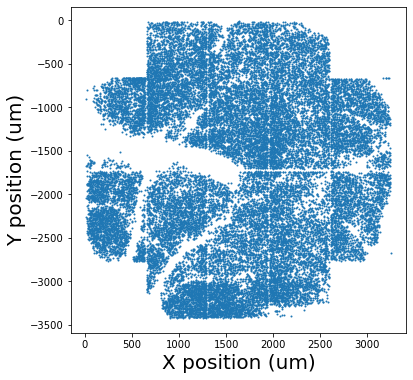

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(xpos, -ypos, s = 1)
plt.xlabel('X position (um)', fontsize=20)
plt.ylabel('Y position (um)', fontsize=20)

In [8]:
neurons_atframes, subset_stim = utils.get_neurons_atframes(timeline,spks)

In [9]:
csig = utils.get_tuned_neurons(neurons_atframes, subset_stim, samples_per_category=4, n_categories=2)

# Visualize tuned neurons

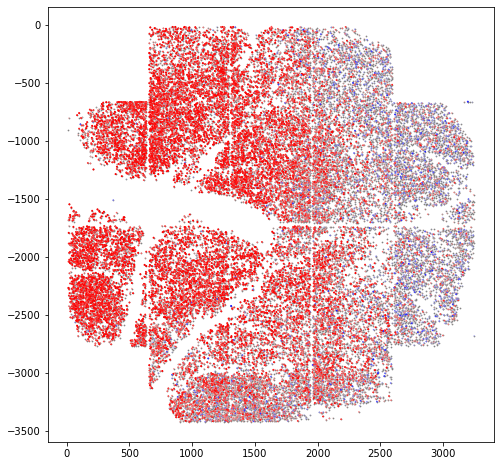

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(xpos, -ypos, c = 'gray', s = .5)
plt.scatter(xpos, -ypos, c = csig, s = csig**2, cmap = 'bwr', vmax = 1, vmin=-1)

In [11]:
decoder_stimuli = utils.get_decoder_stimuli(
    neurons_atframes, subset_stim, samples_per_category=4, selected_category=0,
)

In [14]:
from src.utils import DprimeDecoder
decoder = DprimeDecoder(n_categories=8,samples_per_category=4,selected_category=0,threshold=0.5).fit(decoder_stimuli)
decoder.test(decoder_stimuli,iplane,zstack=2)

# Visualize neurons above 0.5 D-prime

1623 neurons above d-prime = 0.5


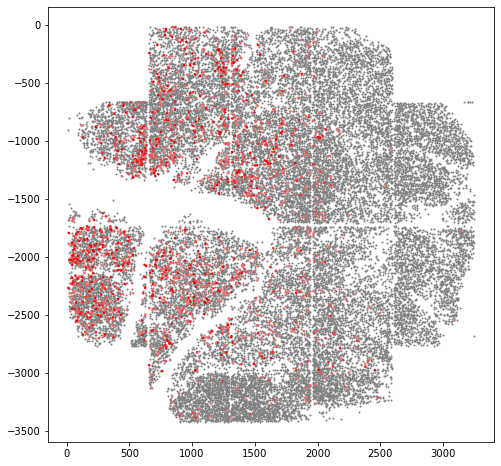

In [15]:
ix = decoder.neurons_abvtresh_
print('%d neurons above d-prime = 0.5'%ix.sum())
plt.figure(figsize=(8,8))
plt.scatter(xpos, -ypos, c = 'gray', s = 1)
plt.scatter(xpos[ix], -ypos[ix], c = decoder.dprime_[0,ix], cmap = 'bwr', vmax = 1, vmin=-1, s = 2);

## Separation based on decoder trained with exemplar 0, and tested with (1,2,3)

Text(0, 0.5, 'decoder average response')

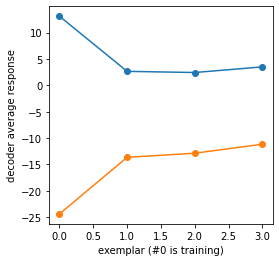

In [16]:
plt.figure(figsize=(4,4))
plt.plot(np.mean(decoder.spop_, -1).reshape((2, 4)).T, '-o')
plt.xlabel('exemplar (#0 is training)')
plt.ylabel('decoder average response')